In [1]:
%run base.ipynb
%matplotlib inline

import SDE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import torch
import torch.optim as optim
import torch.utils.data as torchdata
import ignite.metrics as ignite_metrics

import generative_model
import utils

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Hyperparameters

In [2]:
train_batch_size = 2 ** 10
val_batch_size = 2 ** 10
max_epochs = 500

optimizer_fn = lambda x: optim.Adam(x, lr=0.01)

## Data

In [3]:
n_points = 100

train_dataset = SDE.get_noise(n_points=n_points, num_samples=train_batch_size)
eval_dataset = SDE.get_noise(n_points=n_points, num_samples=val_batch_size)
signals = SDE.get_signal(num_samples=train_batch_size, n_points=n_points,).tensors[0]

train_dataloader = torchdata.DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True, num_workers=8)
eval_dataloader = torchdata.DataLoader(eval_dataset, batch_size=val_batch_size, shuffle=False, num_workers=8)

Feature shape: (2, 100)


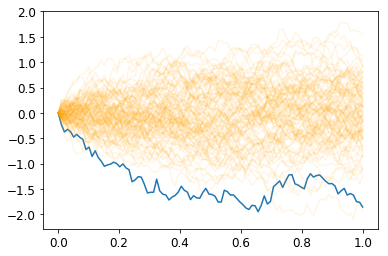

In [4]:
example_batch, _ = next(iter(train_dataloader))
example = example_batch[0]

print(f'Feature shape: {tuple(example.shape)}')
plt.plot(*example.numpy())
for path in signals[:100]:
    plt.plot(*path.numpy(), "orange", alpha=0.1)
plt.show()

In [5]:
# Loss function
loss_fn = generative_model.loss(signals, sig_depth=4, normalise_sigs=True)

## Define Neural Network model

In [6]:
model = generative_model.GenerativeModel(n_points)

## Train Model

In [7]:
history = {}
train_model = utils.create_train_model_fn(max_epochs, optimizer_fn, loss_fn, train_dataloader, eval_dataloader, 
                                          example_batch, metrics={"mse": ignite_metrics.MeanSquaredError()})

In [8]:
train_model(model, 'SigNet', history, device="cpu")

train mse: 0.01524 --- train log-loss: -2.6 --- val mse: 0.01502 --- val log-loss: -2.6
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:13<00:00, 13.87s/it]
train mse: 0.02922 --- train log-loss: -2.6 --- val mse: 0.02747 --- val log-loss: -2.6
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:14<00:00, 14.35s/it]
train mse: 0.05310 --- train log-loss: -2.6 --- val mse: 0.05027 --- val log-loss: -2.6
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:13<00:00, 13.66s/it]
train mse: 0.08230 --- train log-loss: -2.6 --- val mse: 0.07904 --- val log-loss: -2.6
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:21<00:00, 21.87s/it]
train mse: 0.11697 --- train log-loss: -2.6 --- val mse: 0.11429 --- val log-loss: -2.6
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:23<00:00, 23.72s/it]
train mse: 0.16247 --- train log-loss: -2.6 --- val mse: 0.16151 --- val log-loss: -2.6
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:27<00:00, 27.90s/it]
train mse: 0.22883 --- train log-loss: -2.6 --

Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:23<00:00, 23.14s/it]
train mse: 21.65960 --- train log-loss: -4.8 --- val mse: 21.65859 --- val log-loss: -4.7
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:20<00:00, 20.03s/it]
train mse: 21.78907 --- train log-loss: -4.8 --- val mse: 21.75725 --- val log-loss: -4.7
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:19<00:00, 19.60s/it]
train mse: 22.43203 --- train log-loss: -4.9 --- val mse: 22.39475 --- val log-loss: -4.7
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:19<00:00, 19.74s/it]
train mse: 23.47939 --- train log-loss: -4.9 --- val mse: 23.47066 --- val log-loss: -4.7
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:19<00:00, 19.21s/it]
train mse: 24.22871 --- train log-loss: -5.0 --- val mse: 24.25906 --- val log-loss: -4.7
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:21<00:00, 21.06s/it]
train mse: 24.42976 --- train log-loss: -5.0 --- val mse: 24.45473 --- val log-loss: -4.8
Epoch:    0 Loss: 0.000: 100%|████

Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.78s/it]
train mse: 27.74106 --- train log-loss: -7.6 --- val mse: 28.26431 --- val log-loss: -5.9
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.83s/it]
train mse: 27.61144 --- train log-loss: -8.1 --- val mse: 27.94620 --- val log-loss: -6.5
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.84s/it]
train mse: 28.20723 --- train log-loss: -7.7 --- val mse: 28.45176 --- val log-loss: -6.7
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.77s/it]
train mse: 28.84100 --- train log-loss: -7.9 --- val mse: 29.11615 --- val log-loss: -6.5
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.92s/it]
train mse: 29.09313 --- train log-loss: -8.1 --- val mse: 29.46251 --- val log-loss: -6.1
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.76s/it]
train mse: 28.37999 --- train log-loss: -8.1 --- val mse: 28.75448 --- val log-loss: -6.1
Epoch:    0 Loss: 0.000: 100%|████

Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.96s/it]
train mse: 27.57659 --- train log-loss: -8.7 --- val mse: 27.75206 --- val log-loss: -6.9
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.76s/it]
train mse: 27.30569 --- train log-loss: -8.7 --- val mse: 27.43074 --- val log-loss: -7.1
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.75s/it]
train mse: 27.78652 --- train log-loss: -8.9 --- val mse: 27.88674 --- val log-loss: -7.3
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:13<00:00, 13.02s/it]
train mse: 28.40663 --- train log-loss: -8.9 --- val mse: 28.56383 --- val log-loss: -6.9
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.83s/it]
train mse: 28.16786 --- train log-loss: -8.9 --- val mse: 28.33257 --- val log-loss: -6.9
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.92s/it]
train mse: 27.53857 --- train log-loss: -8.9 --- val mse: 27.63651 --- val log-loss: -7.2
Epoch:    0 Loss: 0.000: 100%|████

Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:13<00:00, 13.10s/it]
train mse: 28.25929 --- train log-loss: -9.3 --- val mse: 28.27141 --- val log-loss: -7.3
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.92s/it]
train mse: 28.10632 --- train log-loss: -9.5 --- val mse: 28.09223 --- val log-loss: -7.5
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.95s/it]
train mse: 27.39412 --- train log-loss: -8.8 --- val mse: 27.31329 --- val log-loss: -7.8
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:13<00:00, 13.14s/it]
train mse: 27.15394 --- train log-loss: -8.6 --- val mse: 27.06860 --- val log-loss: -7.7
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.86s/it]
train mse: 27.42747 --- train log-loss: -9.2 --- val mse: 27.38492 --- val log-loss: -7.6
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.97s/it]
train mse: 28.33372 --- train log-loss: -9.1 --- val mse: 28.34814 --- val log-loss: -7.2
Epoch:    0 Loss: 0.000: 100%|████

Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.97s/it]
train mse: 26.82350 --- train log-loss: -8.4 --- val mse: 26.71074 --- val log-loss: -7.4
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:13<00:00, 13.14s/it]
train mse: 27.11417 --- train log-loss: -8.8 --- val mse: 27.00273 --- val log-loss: -7.6
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.82s/it]
train mse: 27.96063 --- train log-loss: -10.0 --- val mse: 27.85353 --- val log-loss: -7.7
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.77s/it]
train mse: 29.12568 --- train log-loss: -8.3 --- val mse: 29.08606 --- val log-loss: -7.0
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.83s/it]
train mse: 29.61431 --- train log-loss: -7.7 --- val mse: 29.59093 --- val log-loss: -6.7
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.90s/it]
train mse: 29.41345 --- train log-loss: -8.1 --- val mse: 29.35896 --- val log-loss: -7.0
Epoch:    0 Loss: 0.000: 100%|███

Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.99s/it]
train mse: 28.25772 --- train log-loss: -9.3 --- val mse: 28.16849 --- val log-loss: -7.3
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.87s/it]
train mse: 28.16751 --- train log-loss: -9.3 --- val mse: 28.07560 --- val log-loss: -7.4
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.90s/it]
train mse: 27.93932 --- train log-loss: -10.1 --- val mse: 27.77995 --- val log-loss: -7.9
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:13<00:00, 13.09s/it]
train mse: 27.91605 --- train log-loss: -10.2 --- val mse: 27.75985 --- val log-loss: -7.9
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.82s/it]
train mse: 28.19276 --- train log-loss: -9.4 --- val mse: 28.09566 --- val log-loss: -7.4
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.69s/it]
train mse: 28.27103 --- train log-loss: -9.6 --- val mse: 28.16298 --- val log-loss: -7.5
Epoch:    0 Loss: 0.000: 100%|██

Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.83s/it]
train mse: 28.03241 --- train log-loss: -10.0 --- val mse: 27.84154 --- val log-loss: -8.0
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.82s/it]
train mse: 28.09642 --- train log-loss: -9.7 --- val mse: 27.97128 --- val log-loss: -7.5
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.78s/it]
train mse: 28.05943 --- train log-loss: -9.8 --- val mse: 27.93116 --- val log-loss: -7.5
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.79s/it]
train mse: 27.97221 --- train log-loss: -10.0 --- val mse: 27.77805 --- val log-loss: -8.0
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.83s/it]
train mse: 27.96881 --- train log-loss: -10.0 --- val mse: 27.77802 --- val log-loss: -8.0
Epoch:    0 Loss: 0.000: 100%|██████████| 1/1 [00:12<00:00, 12.79s/it]
train mse: 28.06024 --- train log-loss: -9.7 --- val mse: 27.93446 --- val log-loss: -7.5
Epoch:    0 Loss: 0.000: 100%|█

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
Traceback (most recent call last):
Traceback (most recent call last):
BrokenPipeError: [Errno 32] Broken pipe
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in 

KeyboardInterrupt: 

## Results

In [40]:
import importlib
importlib.reload(generative_model)

<module 'generative_model' from '/home/perez/Documents/PhD/Deep-Signatures/src/generative_model.py'>

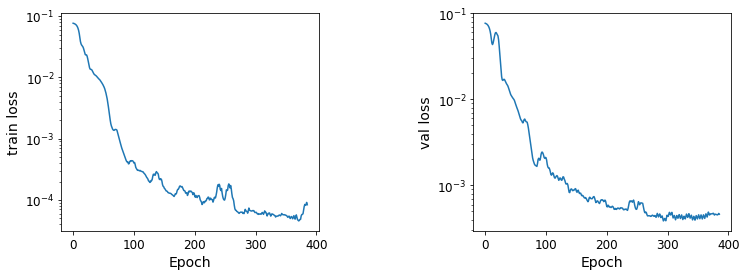

In [41]:
generative_model.print_results(history)

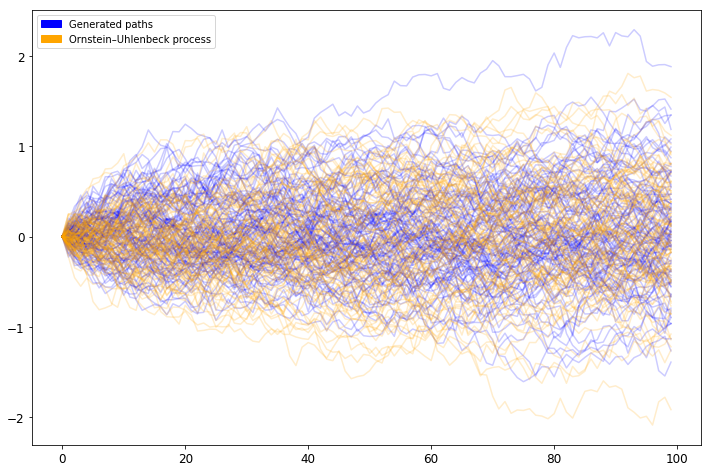

In [42]:
batch, _ = next(iter(eval_dataloader))
generated = np.insert(model(batch).detach().numpy().T, 0, 0, axis=0)
plt.figure(figsize=(12, 8))
plt.plot(generated[:, :100], "b", alpha=0.2)
plt.plot(signals[:100, 1].numpy().T, "orange", alpha=0.2)

orange_patch = mpatches.Patch(color='orange', label='Ornstein–Uhlenbeck process')
blue_patch = mpatches.Patch(color='blue', label='Generated paths')
plt.legend(handles=[blue_patch, orange_patch])

plt.show()